In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



df = pd.read_csv('/datasets/gym_churn_us.csv')

In [6]:
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


# Exploracion de datos

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [8]:
df.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


No aparecen NaN en el describe(). Todas las columnas tienen count = 4000.
4000 registros.

Variables: género, ubicación, edad, contratos, frecuencia de clases, gastos adicionales, etc.

In [9]:
df.groupby('Churn').mean(numeric_only=True)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


# Histograma de caracteristicas de los dos grupos

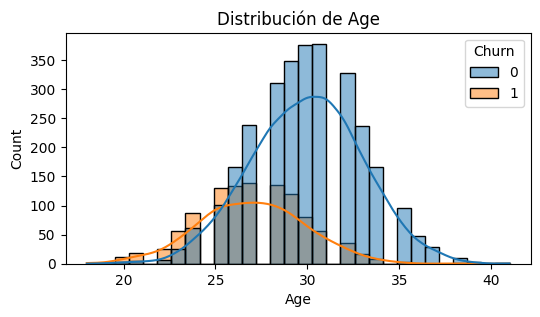

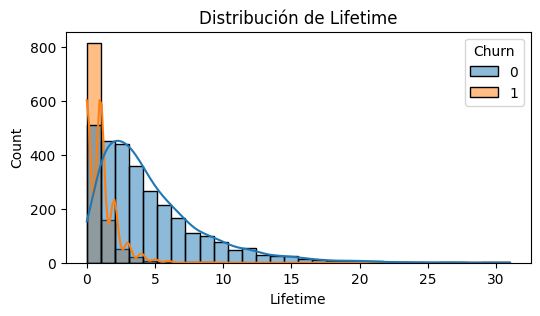

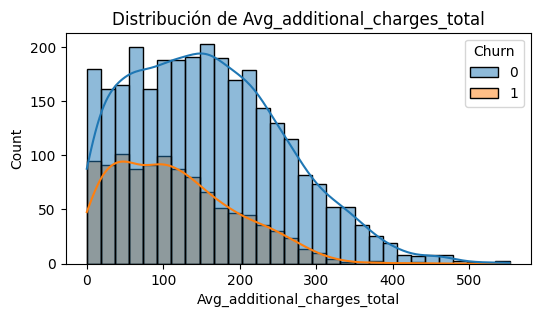

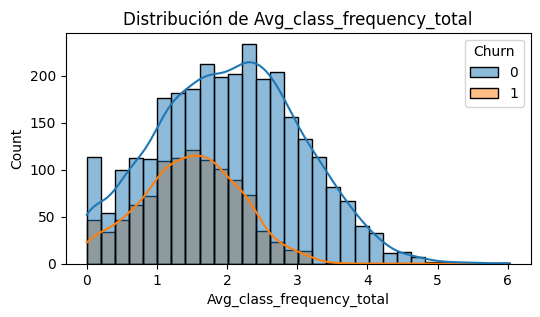

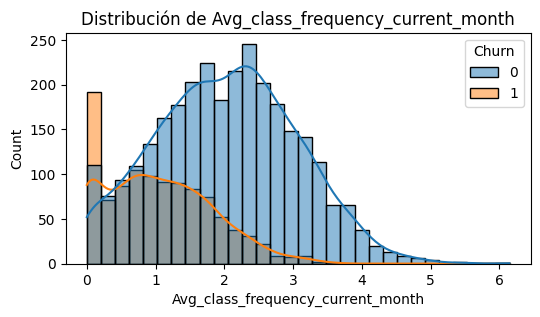

In [11]:


columns_to_plot = ['Age', 'Lifetime', 'Avg_additional_charges_total', 
                   'Avg_class_frequency_total', 'Avg_class_frequency_current_month']

for col in columns_to_plot:
    plt.figure(figsize=(6,3))
    sns.histplot(data=df, x=col, hue='Churn', kde=True, bins=30)
    plt.title(f'Distribución de {col}')
    plt.show()

los usuarios más jóvenes son más propensos a cancelar, mientras que los clientes un poco mayores tienden a permanecer.
la cancelación ocurre principalmente al inicio de la membresía. 
Quienes superan los primeros meses tienen más probabilidades de permanecer.
la constancia en asistir al gimnasio es un factor clave de fidelidad.
Antes de cancelar, los clientes reducen significativamente su asistencia, esto puede servir como señal temprana de cancelacion.


# Matriz de Correlacion

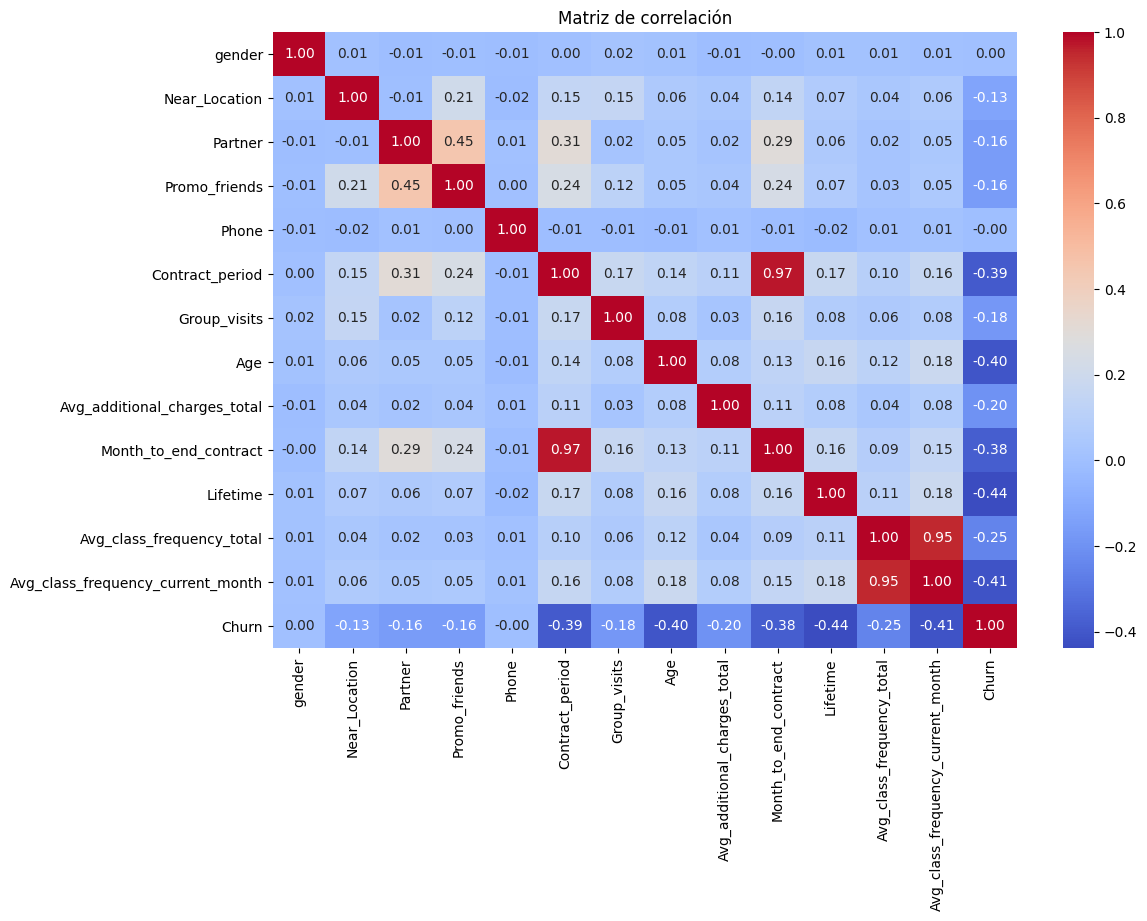

In [14]:

corr = df.select_dtypes(include='number').corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()


Los mejores predictores de cancelacion son:
Lifetime, Age, Frecuencia de visitas (sobre todo la del último mes), y duración del contrato.
Factores protectores secundarios: cercanía, participación en grupos, promos y empresas asociadas.
Variables redundantes: Contract_period y Month_to_end_contract, Avg_class_frequency_total y Avg_class_frequency_current_month (pueden generar multicolinealidad en modelos predictivos).

los clientes más antiguos, mayores, con contratos largos y que mantienen alta frecuencia de visitas son mucho menos propensos a cancelar.
Ser parte de una empresa asociada, llegar con promo de amigos, asistir a grupos y vivir/trabajar cerca ayudan a reducir la cancelación, aunque el efecto es más leve que el de la edad, frecuencia y duración del contrato.

# modelo para predecir la cancelación de usuarios


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

# Regresión logística
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_valid)

# Bosque aleatorio
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_valid)

print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_valid, log_pred))
print("Precision:", precision_score(y_valid, log_pred))
print("Recall:", recall_score(y_valid, log_pred))

print("\nRandom Forest:")
print("Accuracy:", accuracy_score(y_valid, rf_pred))
print("Precision:", precision_score(y_valid, rf_pred))
print("Recall:", recall_score(y_valid, rf_pred))

/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression:
Accuracy: 0.9241666666666667
Precision: 0.8840579710144928
Recall: 0.8052805280528053

Random Forest:
Accuracy: 0.9133333333333333
Precision: 0.8592057761732852
Recall: 0.7854785478547854


La regresión logística ganó en todos los indicadores (Accuracy, Precision y Recall).
Muchas variables están correlacionadas (lo que a veces afecta a Random Forest).
La tendecia de cancelacion tiene señales lineales claras (edad, frecuencia, contrato), lo que favorece a la regresión logística.

La regresión logística es más eficiente que el Random Forest para predecir la marcha del usuario.
Sin embargo, ambos modelos muestran muy buen desempeño (>91% accuracy).
El recall (detección de clientes que se van) la regresión logística lo hace mejor.

# Clustering de clientes

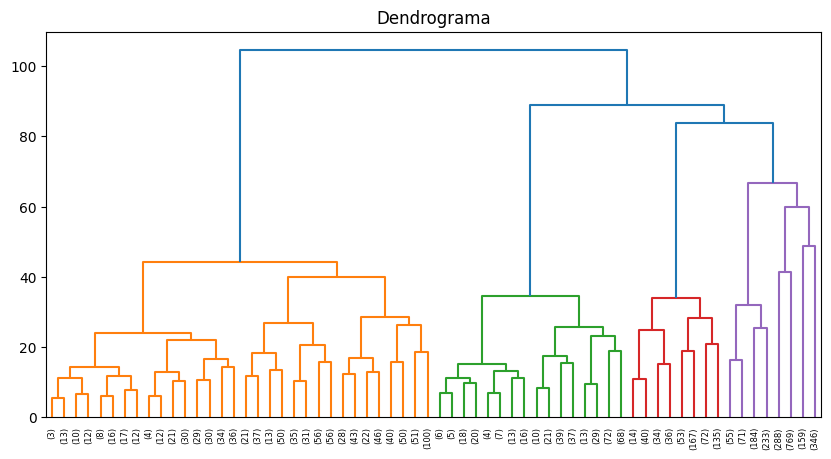

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

X_clust = df.drop('Churn', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clust)

# Dendrograma
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Dendrograma')
plt.show()

Es probable que algunos clusters correspondan a clientes fieles (alta frecuencia de visitas, contratos largos, alta antigüedad).
Otros clusters parecen ser de usuarios de riesgo de cancelacion (contratos cortos, baja frecuencia de visitas, poca antigüedad).
También pueden existir segmentos intermedios (ej. clientes jóvenes con buena frecuencia pero baja antigüedad).

In [17]:
# K-means con 5 clústeres
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Características promedio por clúster
df.groupby('cluster').mean(numeric_only=True)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster,,,,,,,,,,,,,,
0,0.502370,0.949447,0.829384,0.998420,1.0,3.097946,0.448657,29.104265,141.774331,2.887836,3.772512,1.770536,1.669581,0.246445
1,0.554556,0.849269,0.263217,0.052868,1.0,2.606299,0.436445,30.008999,159.774265,2.419573,4.780652,2.745505,2.733173,0.089989
2,0.499422,0.937572,0.737572,0.478613,1.0,11.854335,0.546821,29.905202,163.509804,10.812717,4.677457,2.006405,1.998179,0.021965
3,0.485738,0.718011,0.299919,0.018745,1.0,1.914425,0.276284,28.083945,129.496414,1.821516,2.195599,1.225192,0.967967,0.572942
4,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,1.723967,0.266839


In [18]:

# Distribución de cancelación por clúster
df.groupby('cluster')['Churn'].mean()


cluster
0    0.246445
1    0.089989
2    0.021965
3    0.572942
4    0.266839
Name: Churn, dtype: float64

Clusters 1 y 2 son los más valiosos: clientes fieles, casi no se van. Conviene mantenerlos motivados con beneficios y experiencias positivas.

Cluster 3 es el grupo crítico: más de la mitad cancela. Aquí deberían enfocarse las estrategias de retención (contacto temprano, promociones, actividades grupales, seguimiento personalizado).

Clusters 0 y 4 están en un punto intermedio: no son tan leales como los mejores, pero tampoco tan problemáticos como el 3.

El análisis muestra que los clientes con contratos más largos, mayor antigüedad y una asistencia frecuente al gimnasio presentan una probabilidad significativamente menor de cancelar su membresía. Por el contrario, la mayoría de cancelaciones ocurren en los primeros meses, especialmente entre usuarios jóvenes y con baja frecuencia de visitas. Además, detectamos un grupo de clientes con un índice de cancelación muy alto, que requiere atención especial, mientras que otros clusters muestran comportamientos de gran fidelidad. Factores adicionales como las promociones de amigos, la cercanía al gimnasio, la participación en actividades grupales y los convenios con empresas asociadas también contribuyen a reducir el riesgo de abandono, aunque con un efecto menor.

A partir de estos hallazgos, se pueden plantear varias recomendaciones estratégicas. En primer lugar, es clave fomentar contratos de mayor duración mediante descuentos progresivos en planes de 6 a 12 meses o beneficios exclusivos, lo que refuerza la permanencia. En segundo lugar, conviene estimular la asistencia constante, por ejemplo, a través de programas de gamificación que premien la frecuencia mensual o mediante alertas automáticas a quienes reduzcan sus visitas, ya que la caída en la asistencia suele anticipar la cancelación.

En tercer lugar, fortalecer la comunidad es una herramienta valiosa para la retención. Clases grupales, retos entre clientes o promociones como “trae a un amigo” generan un sentido de pertenencia que reduce la deserción. También es recomendable aprovechar convenios con empresas del vecindario para atraer y fidelizar clientes cercanos. Finalmente, se debe poner especial foco en los clientes en riesgo, en particular los identificados en el cluster de alta cancelacion. Para ellos, se pueden implementar seguimientos personalizados, llamadas de fidelización, cupones de descuento y programas de acompañamiento durante los primeros meses, cuando la probabilidad de abandono es mayor.

En resumen, una estrategia de retención efectiva se puede apoyar en cuatro pilares: contratos más largos, asistencia frecuente, fortalecimiento de la comunidad y atención temprana a los clientes en riesgo. Estos principios permiten diseñar acciones de marketing simples y directas que, aplicadas en conjunto, incrementan la fidelidad y reducen de forma notable la tasa de cancelación.